In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc

(321, 481)


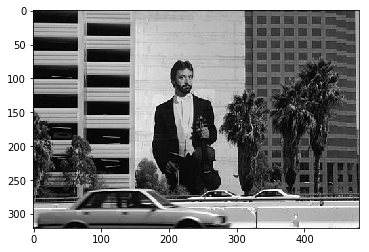

<Figure size 432x288 with 0 Axes>

In [2]:
img = cv2.imread("image2.jpg",0)/255
plt.imshow(img,cmap='gray')
plt.figure()
print(img.shape)

In [3]:
def sob(img):
    #Generates gradients in x and y direction with kernal size 3
    gradx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    grady = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    return gradx.astype(np.int64),grady.astype(np.int64)


In [4]:
#Shi-tomasi Algorithm which takes image, kernalSize and threshold as input and calculates the Hessian Matrix for each window and
#finds eigen values.If min eigen value is greater than threshold keep the value else remove it.The output of this function gives
#the thresholded image and co-ordinates of valid points
def shitomasi(img,kernalSize,threshold):
    temp = np.zeros(img.shape)
    n  = img.shape[0]
    m = img.shape[1]
    w = kernalSize
    #sob() generates the gradients of image and pad it according to window size
    gradx,grady = sob(img)
    gradx = np.pad(gradx,(int(w/2),int(w/2)),mode='constant')
    grady = np.pad(grady,(int(w/2),int(w/2)),mode='constant')
    x = []
    y = []
    # For each window calculate hessian matrix and find eigen values
    for i in range(n):
        
        for j in range(m):
            
            temp1 = gradx[i:i+w, j:j+w]
            temp2 = grady[i:i+w, j:j+w]
            
            Wx = np.sum(temp1**2)
            Wxy = np.sum(temp1*temp2)
            Wy = np.sum(temp2**2)
            
            matrix = [[Wx, Wxy],[Wxy, Wy]]
            [lamda1,lamda2] = np.linalg.eigvals(matrix)
            mini = min(lamda1,lamda2) 
            #If min eigen value is greater than threshold keep the value and store its co-ordinates 
            if  mini > threshold:
                temp[i][j] = mini
                x.append(i)
                y.append(j)
    return temp,x,y

In [5]:
#Harris-Corner Algorithm which takes image, kernalSize and threshold as input and calculates the Hessian Matrix for each window 
#and finds f which is calculated using determinent of hessian matrix and trace of hessian matrix.If f value is greater than 
#threshold keep the value else remove it.The output of this function gives the thresholded image and coordinates of valid points
def HarrisCorner(img,kernalSize,threshold):
    temp = np.zeros(img.shape)
    n  = img.shape[0]
    m = img.shape[1]
    w = kernalSize
    #sob() generates the gradients of image and pad it according to window size
    gradx,grady = sob(img)
    gradx = np.pad(gradx,(int(w/2),int(w/2)),mode='constant')
    grady = np.pad(grady,(int(w/2),int(w/2)),mode='constant')
    x = []
    y = []
    # For each window calculate hessian matrix and find f value
    for i in range(n):
        for j in range(m):
            
            temp1 = gradx[i:i+w, j:j+w]
            temp2 = grady[i:i+w, j:j+w]
            
            Wx = np.sum(temp1**2)
            Wxy = np.sum(temp1*temp2)
            Wy = np.sum(temp2**2)
            
            #Det And Trace through which f value is determined
            Wdet = Wx*Wy - Wxy**2
            Wtrace = Wx + Wy
            
            f = Wdet - 0.04*(Wtrace**2)
            #If f is greater than threshold keep the value and store its co-ordinates
            if f > threshold:
                temp[i][j] = f
                x.append(i)
                y.append(j)
    return temp,x,y

In [6]:
#A function that takes image and corner co-ordinates and plot them on the image 
def plot_points(image,x,y): 
    
    
    plt.imshow(image)
    plt.plot([p for p in y],
                [p for p in x],'.',color="red")
    
    
    plt.figure()


In [7]:
#The function maxfilter takes outputs from shi-tomasi and harris corner algorithms as inputs and finds the maximum value in the
#local neighbourhood of the window size by applying a window on the response
def maxfilter(conv_img, filterType, w):
    n, m = conv_img.shape
    if(w%2==0):
        w=w+1
    w = filterType.shape[0]
    conv_img = np.pad(conv_img,(int(w/2),int(w/2)),mode='constant')
    temp1=[]
    x=[]
    y=[]
    #for each window calculate the max value in the neighbourhood and check if the middle pixel has the highest response
    for i in range(n):
        temp=[]
        for j in range(m):
            k = conv_img[i:i+w, j:j+w]
            val = np.multiply(k, filterType)
            maxi = np.amax(val)
            
            #if max value is in the middle pixel of the neighbourhood retain it
            if(maxi==k[w//2,w//2] and maxi!=0):
                temp.append(1)
                x.append(i)
                y.append(j)
            else:
                temp.append(0)
        temp1.append(temp)
   
    return np.array(temp1),x,y
dummy=np.array([[1,2,3,4,5],
       [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
ones=np.array([[1,1,1],
       [1,1,1],[1,1,1]])
temp = np.zeros((3,3))

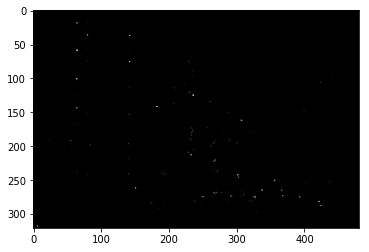

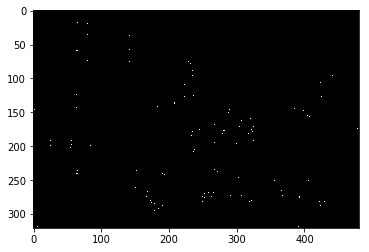

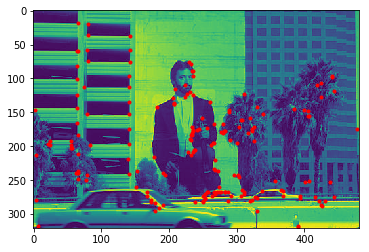

<Figure size 432x288 with 0 Axes>

In [8]:
#This is For Harris Corner detection
HarrisResponse,x,y = HarrisCorner(img,3,10)
HarrisFeatures,xh,yh = maxfilter(HarrisResponse,ones,5)

plt.imshow(HarrisResponse,cmap="gray")
plt.figure()

plt.imshow(HarrisFeatures,cmap="gray")
plt.figure()

plot_points(img,xh,yh)

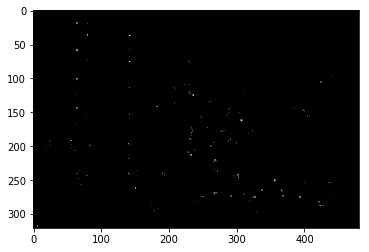

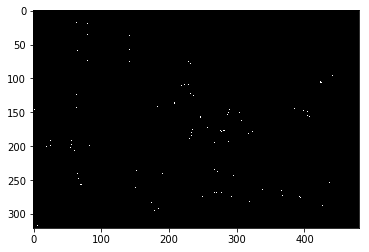

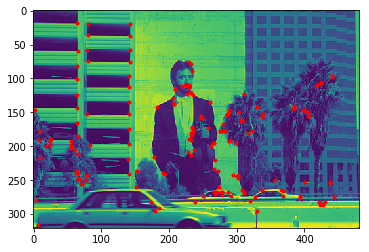

<Figure size 432x288 with 0 Axes>

In [9]:
#3,1000
#This is For Shitomasi
shiTomResponse,xs,ys = shitomasi(img,3,2)
shiTomFeatures,xs,ys = maxfilter(shiTomResponse,ones,15)

plt.imshow(shiTomResponse,cmap="gray")
plt.figure()

plt.imshow(shiTomFeatures,cmap="gray")
plt.figure()

plot_points(img,xs,ys)

In [10]:
# def maximum(det, phase):
#   gmax = np.zeros(det.shape)
#   for i in range(gmax.shape[0]):
#     for j in range(gmax.shape[1]):
#       if phase[i][j] < 0:
#         phase[i][j] += 360

#       if ((j+1) < gmax.shape[1]) and ((j-1) >= 0) and ((i+1) < gmax.shape[0]) and ((i-1) >= 0):
#         # 0 degrees
#         if (phase[i][j] >= 337.5 or phase[i][j] < 22.5) or (phase[i][j] >= 157.5 and phase[i][j] < 202.5):
#           if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]:
#             gmax[i][j] = det[i][j]
#         # 45 degrees
#         if (phase[i][j] >= 22.5 and phase[i][j] < 67.5) or (phase[i][j] >= 202.5 and phase[i][j] < 247.5):
#           if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]:
#             gmax[i][j] = det[i][j]
#         # 90 degrees
#         if (phase[i][j] >= 67.5 and phase[i][j] < 112.5) or (phase[i][j] >= 247.5 and phase[i][j] < 292.5):
#           if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]:
#             gmax[i][j] = det[i][j]
#         # 135 degrees
#         if (phase[i][j] >= 112.5 and phase[i][j] < 157.5) or (phase[i][j] >= 292.5 and phase[i][j] < 337.5):
#           if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]:
#             gmax[i][j] = det[i][j]
#   return gmax